## Otimização de projeto em engenharia mecânica

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
%matplotlib inline

### Função, gradiente e hessiana

* $f(x)$ - função a ser minimizada
* $\nabla f(x)$ - gradiente de $f(x)$
* $\nabla^2 f(x)$ - hessiana de $f(x)$

In [3]:
def func(x0):
    x1, x2 = x0[0],x0[1]
    return((1 - x1)**2 + 100* (x2 - x1**2)**2)

def grad(x0):
    x1, x2 = x0[0],x0[1]
    return(np.array([400*x1**3 - 400*x1*x2 +\
                     2*x1 - 2, 200*x2 -\
                     200*x1**2]).reshape((2,1)))

def hess(x0):
    x1, x2 = x0[0],x0[1]
    return(np.array([1200*x1**2 - 400*x2 + 2,
                    -400*x1, -400*x1,
                     200]).reshape((2,2)))

def direction(x0,flag,df=0,alpha=1,d2f=0):
    if flag == 0:
        d = -grad(x0).T
    elif flag == 1:
        df = grad(x0)
        if type(d2f) == int:
            d2f = hess(x0)
        try:
            d = solve(d2f,-df,sym_pos=True,check_finite=True).T
        except:
            l = 1e3
            d2f = d2f + l * np.eye(2)
            d = solve(d2f,-df).T
            while func(x0) < func(x0 + alpha*d[0]):
                l = l * 2
                d2f = d2f + l * np.eye(2)
                d = solve(d2f,-df).T
    return(d)

def hess_num(x0,df,alpha,d,H=np.eye(2)):
    try:
        solve(H,-df,check_finite=True).T
    except:
        H = np.eye(2)
    c = grad(x0 + alpha * d)
    y = c - df
    s = alpha * d
    #print(c,'c\n',y,'y\n',s,'s\n',d,'d\n',df)
    D = np.matmul(y,y.T) / np.dot(y.T[0],s)
    E = np.matmul(df,df.T) / np.dot(df.T[0],d)
    return(H + D + E)

def step(x0,d,inc=1e-6):
    soma = 0
    f1 = func(x0)
    m = (np.sqrt(5) + 1) / 2    
    for i in range(100):
        soma += m**i
        if func(x0+inc*(soma)*d) > f1 and i > 0:
            break
        elif func(x0+inc*(soma)*d) > f1 and i == 0:
            inc = inc / 10
    I = inc * m**(i-1)*(1+m)
    T = 1 / m
    Au = inc * (soma)
    Al = inc * (soma - m**i*(1+1/m))
    Ab = T * I + Al
    Aa = (1-T) * I + Al
    fa = func(x0+Aa*d)
    fb = func(x0+Ab*d)
    while I > 1e-3:
        if fa < fb:
            Au, Ab = Ab, Aa    
            Aa = Al + (1-T) * (Au-Al)
            fb, fa = fa, func(x0+Aa*d)
        elif fa > fb:
            Al, Aa = Aa, Ab            
            Ab = T * (Au-Al) + Al
            fa, fb = fb, func(x0+Ab*d)
        else:
            Al,Au = Aa, Ab            
            Ab = T * (Au-Al) + Al
            Aa = (1-T) * (Au-Al) + Al
            fa = func(x0+Aa*d)
            fb = func(x0+Ab*d)
        I = Au - Al
    A = 0.5*(Au+Al)
    return(A)

#### Função teste

* Rosenbrock's banana function

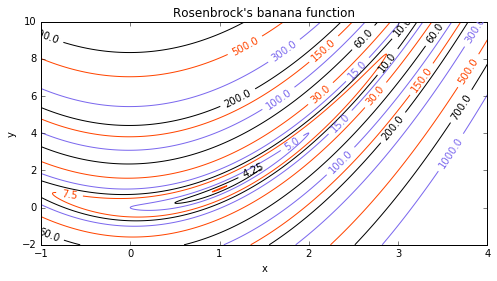

In [476]:
xx = np.linspace(-1,4,1000)
yy = np.linspace(-2,10,1000)
x1,x2 = np.meshgrid(xx,yy)
Z = 10*x1**4 - x2*20*x1**2 +\
           10*x2**2 + x1**2 -2*x1 + 5

levels = [4.007,4.25,5,7.5,10,15,30,60,100,150,
          200,300,500,700,1000]
cors = ('#FF4500','#000000','#7B68EE')*5
plt.figure(figsize=(8,4))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
forms = {i:str(i) for i in cp.levels}
plt.clabel(cp, inline=True,fontsize=10,fmt=forms)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")

Algoritmo de minimização

12169.4706541
[ 1.  1.] 6.76519691965e-20 39 2.23868861317e-09


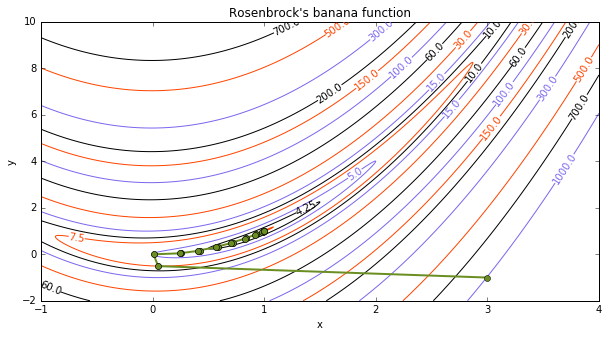

In [496]:
epsilon = 1e-6
x0 = [3,-1]
f,df,d2f = func(x0), grad(x0), 10*np.eye(2)
print(np.linalg.norm(df))
x = x0
i = 0
xp,yp,fp = [x0[0]], [x0[1]], [f]
d = direction(x,1,d2f=d2f)[0]
inc = 0.5
a = step(x,d,inc)
d1,d2 = [],[]#[a*d[0]],[a*d[1]]

while np.linalg.norm(df) > epsilon and i < 500:
    if np.linalg.norm(df) == 0 and all(np.linalg.eigvals(d2f) > 0):
        print('x é minimizador')
        break
    elif func(x + a*d) <= f:
        while func(x + a*d) <= f:
            dx = a*d
            x += dx
            f,df = func(x), grad(x)
            a = step(x,d,inc)
    else:        
        #print(np.dot(d,df)<-0.05*np.linalg.norm(df)*np.linalg.norm(d),'\n')
        #print(np.linalg.norm(df)*0.001 < np.linalg.norm(d))
        d = direction(x,1,a,d2f=d2f)[0]
        d2f = hess_num(x,df,a,d,d2f)        
        a = step(x,d,inc)                    
    d1.append(dx[0]),d2.append(dx[1])        
    xp.append(x[0]),yp.append(x[1]) 
    i += 1
print(x,f,i,np.linalg.norm(df))
#xp,yp = np.array(xp),np.array(yp)
#d1,d2 = np.array(d1),np.array(d2)
plt.figure(figsize=(10,5))
cp = plt.contour(x1,x2,Z,levels,colors=cors)
plt.plot(xp,yp,color='#6B8E23',marker='o',
         ls='-',mfc='#6B8E23',linewidth=2)
plt.clabel(cp,cp.levels,rightside_up=True,inline_spacing=-1,
           fmt=forms,inline=True,fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Rosenbrock's banana function")
#plt.axis([0,4,-2,10])

In [228]:
d,df,np.linalg.norm(d),np.linalg.norm(df)

(array([ 0.00866182, -0.00323386]), array([[-0.00033622],
        [-0.00092474]]), 0.009245808333923973, 0.00098396805003937151)

In [116]:
f1 = func(x0)
m = (np.sqrt(5) + 1) / 2
soma = 0
inc = 0.05
alpha = 1
for i in range(30):
    print(soma)
    soma += m**i
    if func(x0+inc*soma*d) > f1:
        I = inc * m**(i-1)*(1 + m)
        print(i,I,f1,func(x0+inc*(soma-m**i*(1+1/m))*d))
        break

0
1.0
2.61803398875
5.2360679775
9.472135955
16.3262379212
27.416407865
45.360679775
74.3951216287
8 3.80065778087 756.5 30.0655367023
